In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization

In [2]:
# Using this to be able to plot spectra. For some reason Jupyter won't let me plot spectra without this
%matplotlib inline

### Ultimately, we want the ML algorithm to be able to pick out high-z sources from noise!

In [3]:
# loading in the decoded sources I got from inputting random encoded sources into t-sne.
# These will be our testing sample
random_highz_sources = np.load("highz_sources.npy")

# Use autoencoder to decode my data.

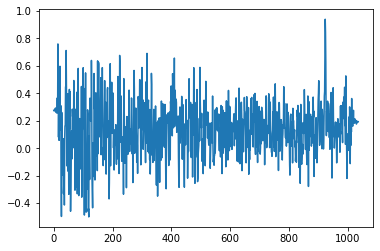

In [4]:
plt.plot(random_highz_sources[90])

In [5]:
# loading in my high confidence high z sources.
high_confidence_highz_spectra = np.load("high_confidence_highz_1000.npy", allow_pickle = True)

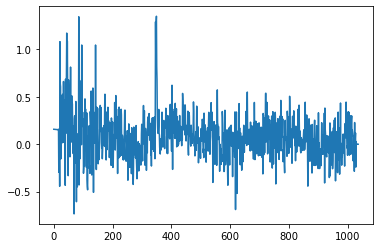

In [6]:
plt.plot(high_confidence_highz_spectra[100])

In [7]:
# loading in the noise sample.
noise_sample = np.load("noise_sample_1000.npy", allow_pickle = True)

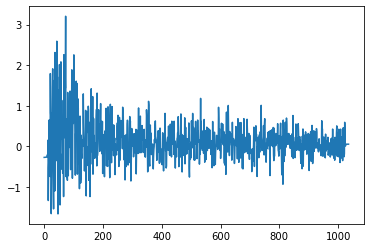

In [8]:
plt.plot(noise_sample[0])

## Random-Forest classification

https://levelup.gitconnected.com/random-forest-regression-209c0f354c84#:~:text=Random%20Forest%20Regression%20is%20a%20supervised%20learning%20algorithm%20that%20uses,prediction%20than%20a%20single%20model.

In [104]:
# importing required libraries 
# importing Scikit-learn library and datasets package
from sklearn import datasets  

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [105]:
X = random_highz_sources
y = high_confidence_highz_spectra[:292]

In [106]:
y

array([[ 0.41081296,  0.41056771,  0.41032136, ...,  0.41890103,
         0.41887913,  0.41885743],
       [ 1.20387206,  1.20359651,  1.20331597, ...,  0.00273487,
         0.00276128,  0.00278742],
       [-0.38469669, -0.38329977, -0.38190232, ..., -0.15185886,
        -0.15180493, -0.15175154],
       ...,
       [-1.81165756, -1.81271321, -1.81375878, ...,  0.15669748,
         0.15670915,  0.1567207 ],
       [-1.55003453, -1.55048932, -1.55094907, ...,  0.07456301,
         0.07455089,  0.07453888],
       [-0.13259506, -0.13331687, -0.1340375 , ..., -0.02563831,
        -0.02562329, -0.02560842]])

In [108]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(n_estimators=10, random_state=0)

In [109]:
Y_pred = regressor.predict(X_test)

In [110]:
Y_pred

array([[ 0.08742358,  0.08761461,  0.0878174 , ...,  0.11149979,
         0.11149583,  0.11149192],
       [ 0.02554303,  0.02548428,  0.02542442, ...,  0.1011385 ,
         0.10113838,  0.10113826],
       [-0.04789636, -0.04809619, -0.04829643, ...,  0.00826041,
         0.00826282,  0.0082652 ],
       ...,
       [-1.18283965, -1.18310914, -1.18337564, ...,  0.02242018,
         0.02242407,  0.02242793],
       [ 0.4939545 ,  0.494044  ,  0.4941477 , ...,  0.15540695,
         0.15541021,  0.15541344],
       [-1.67127583, -1.67155521, -1.67183183, ..., -0.0459769 ,
        -0.04596384, -0.0459509 ]])

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred)

-0.16586170421622357

In [ ]:
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))

In [61]:
high_confidence_highz_spectra[500]

array([0.72614989, 0.72456911, 0.72298829, ..., 0.14989546, 0.14988026,
       0.14986522])

In [60]:
high_confidence_highz_spectra[500].reshape(1, -1)

array([[0.72614989, 0.72456911, 0.72298829, ..., 0.14989546, 0.14988026,
        0.14986522]])

In [63]:
high_confidence_highz_spectra[500].reshape(-1, 1)

array([[0.72614989],
       [0.72456911],
       [0.72298829],
       ...,
       [0.14989546],
       [0.14988026],
       [0.14986522]])

In [ ]:
test_arr = 

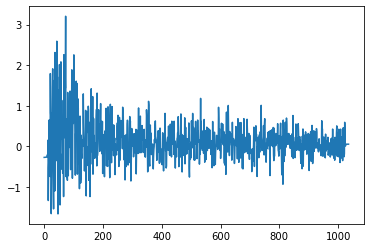

In [75]:
plt.plot(noise_sample[0])

In [98]:
Y_pred = regressor.predict(high_confidence_highz_spectra[500].reshape(1, -1))

In [99]:
noise_sample[0]

array([-0.27453507, -0.27376958, -0.27300397, ...,  0.05124273,
        0.05123827,  0.05123386])

In [100]:
print(Y_pred)

[[1.20313146 1.20450366 1.20587209 ... 0.10689663 0.10690426 0.10691158]]


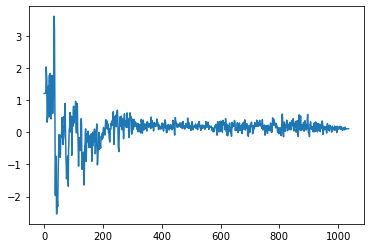

In [101]:
plt.plot(Y_pred[0])
plt.show()

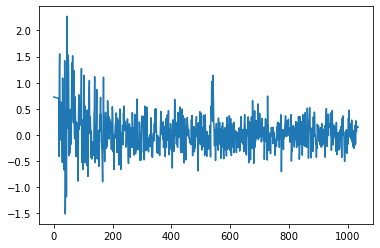

In [102]:
plt.plot(high_confidence_highz_spectra[500])

ValueError: X has 1 features, but RandomForestRegressor is expecting 1036 features as input.

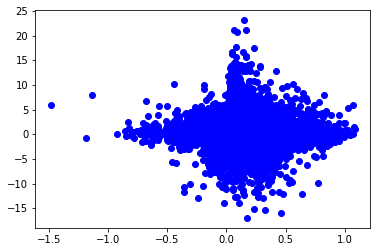

In [56]:
X_grid = np.arange(X.min(), X.max(), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(X, y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [107]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Create training/ test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((195, 1036), (97, 1036))

In [39]:
y

array([[ 0.41081296,  0.41056771,  0.41032136, ...,  0.41890103,
         0.41887913,  0.41885743],
       [ 1.20387206,  1.20359651,  1.20331597, ...,  0.00273487,
         0.00276128,  0.00278742],
       [-0.38469669, -0.38329977, -0.38190232, ..., -0.15185886,
        -0.15180493, -0.15175154],
       ...,
       [-1.81165756, -1.81271321, -1.81375878, ...,  0.15669748,
         0.15670915,  0.1567207 ],
       [-1.55003453, -1.55048932, -1.55094907, ...,  0.07456301,
         0.07455089,  0.07453888],
       [-0.13259506, -0.13331687, -0.1340375 , ..., -0.02563831,
        -0.02562329, -0.02560842]])

In [37]:
test_y = y.flatten()

In [38]:
test_y

array([ 0.41081296,  0.41056771,  0.41032136, ..., -0.02563831,
       -0.02562329, -0.02560842])

In [35]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

#view transformed values
print(y_transformed)

ValueError: y should be a 1d array, got an array of shape (292, 1036) instead.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [34]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous-multioutput'

In [30]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

# variables = my_data[['Clicked']] #values are integers, only 0 and 1 (0 = not clicked , 1 = clicked)
# results = my_data[['Daily Time on Site', 'Age', 'Gender']] #values are integers and floats

multi_output_clf = MultiOutputRegressor(LinearRegression())
multi_output_clf.fit(X.reshape(-1, 1), y)

x = multi_output_clf.predict([1])
print(x)

ValueError: Found input variables with inconsistent numbers of samples: [302512, 292]

In [18]:
multi_output_clf = MultiOutputRegressor(LinearRegression())
multi_output_clf.fit(variables.values.reshape(-1, 1),results)

NameError: name 'MultiOutputRegressor' is not defined

In [17]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

ValueError: Unknown label type: 'continuous-multioutput'